<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo I: Análisis Exploratorio de Datos (EDA) </font> </center>



### ¿Qué es?

Es cuando revisamos por primera vez los datos que nos llegan, por ejemplo un archivo CSV que nos entregan y deberemos intentar comprender **¿de qué se trata?**, vislumbrar posibles patrones y reconociendo distribuciones estadísticas que puedan ser útiles en el futuro.

Lo ideal es que tengamos un objetivo que nos hayan *“adjuntado”* con los datos, que indique lo que se quiere conseguir a partir de esos datos. Por ejemplo, nos pasan un excel y nos dicen *“Queremos predecir ventas a 30 días”*, ó *“Clasificar casos malignos/benignos de una enfermedad”*, *“Queremos identificar audiencias que van a realizar re-compra de un producto”*, *“queremos hacer pronóstico de fidelización de clientes/abandonos”*, *“Quiero detectar casos de fraude en mi sistema en tiempo real”*.

### ¿Que hacer cuando llegar un archivo?

- ¿Cuántos registros hay?
    - ¿Son demasiado pocos?
    - ¿Son muchos y no tenemos Capacidad (CPU+RAM) suficiente para procesarlo?
    
- ¿Están todas las filas completas ó tenemos campos con valores nulos?
    - En caso que haya demasiados nulos: ¿Queda el resto de información inútil?
    
- ¿Que datos son discretos y cuales continuos?
    - Muchas veces sirve obtener el tipo de datos: texto, int, double, float
    
- Si es un problema de tipo supervisado:
    - ¿Cuál es la columna de “salida”? ¿binaria, multiclase?
    - ¿Esta balanceado el conjunto salida?
    
- ¿Cuales parecen ser features importantes? ¿Cuales podemos descartar?

- ¿Siguen alguna distribución?

- ¿Hay correlación entre features (características)?

- En problemas de NLP es frecuente que existan categorías repetidas ó mal tipeadas, ó con mayusculas/minúsculas, singular y plural, por ejemplo “Abogado” y “Abogadas”, “avogado” pertenecerían todos a un mismo conjunto.

- ¿Estamos ante un problema dependiente del tiempo? Es decir un TimeSeries.

- Si fuera un problema de Visión Artificial: ¿Tenemos suficientes muestras de cada clase y variedad, para poder hacer generalizar un modelo de Machine Learning?

- ¿Cuales son los Outliers? (unos pocos datos aislados que difieren drásticamente del resto y “contaminan” ó desvían las distribuciones)
    - Podemos eliminarlos? es importante conservarlos?
    - son errores de carga o son reales?
    
- ¿Tenemos posible sesgo de datos? (por ejemplo perjudicar a clases minoritarias por no incluirlas y que el modelo de ML discrimine)


## Ejemplo de un EDA

In [1]:
import pandas as pd
import numpy as np


In [2]:
df_movie = pd.read_csv('../Data/movie_metadata.csv')
df_movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
class CDIN:
    def __init__(self, df):
        self.data = df
    # Métodos para clasificación de Datos en un DataFrame (Cualitativos, Cuantitativos, Binarios)
    
    #def get_cuantitativos:
    #    return col_cuantitativos, df_cuantitativos
    
    #def get_cualitativos:
    #    return col_cualitativos, df_cualitativos
    
    def get_binaries(self):
        df_cat = self.data.select_dtypes(include=['object']).copy()
        column_cat = df_cat.columns
        column_binaries = []
        for col in column_cat:
            if df_cat[col].nunique() == 2:
                column_binaries.append(col)
        return column_binaries, self.data[column_binaries]

In [5]:
cd_movie = CDIN(df_movie)

In [6]:
cd_movie.get_binaries()

(['color'],
       color
 0     Color
 1     Color
 2     Color
 3     Color
 4       NaN
 ...     ...
 5038  Color
 5039  Color
 5040  Color
 5041  Color
 5042  Color
 
 [5043 rows x 1 columns])

## Manejando datos faltantes

In [7]:
df_movie_clean = df_movie.dropna()
df_movie_clean

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [8]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [9]:
df_movie_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3756 non-null   object 
 1   director_name              3756 non-null   object 
 2   num_critic_for_reviews     3756 non-null   float64
 3   duration                   3756 non-null   float64
 4   director_facebook_likes    3756 non-null   float64
 5   actor_3_facebook_likes     3756 non-null   float64
 6   actor_2_name               3756 non-null   object 
 7   actor_1_facebook_likes     3756 non-null   float64
 8   gross                      3756 non-null   float64
 9   genres                     3756 non-null   object 
 10  actor_1_name               3756 non-null   object 
 11  movie_title                3756 non-null   object 
 12  num_voted_users            3756 non-null   int64  
 13  cast_total_facebook_likes  3756 non-null   int64

In [10]:
df_movie['duration']

0       178.0
1       169.0
2       148.0
3       164.0
4         NaN
        ...  
5038     87.0
5039     43.0
5040     76.0
5041    100.0
5042     90.0
Name: duration, Length: 5043, dtype: float64

In [11]:
df_movie['duration'].mean()

107.2010739856802

In [12]:
df_movie['duration'].fillna(df_movie['duration'].mean())

0       178.000000
1       169.000000
2       148.000000
3       164.000000
4       107.201074
           ...    
5038     87.000000
5039     43.000000
5040     76.000000
5041    100.000000
5042     90.000000
Name: duration, Length: 5043, dtype: float64

In [13]:
df_movie['genres']

0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Action|Thriller
4                           Documentary
                     ...               
5038                       Comedy|Drama
5039       Crime|Drama|Mystery|Thriller
5040              Drama|Horror|Thriller
5041               Comedy|Drama|Romance
5042                        Documentary
Name: genres, Length: 5043, dtype: object

In [14]:
df_movie['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [15]:
df_movie['color'].fillna('unk')


0       Color
1       Color
2       Color
3       Color
4         unk
        ...  
5038    Color
5039    Color
5040    Color
5041    Color
5042    Color
Name: color, Length: 5043, dtype: object

In [16]:
df_movie['director_name']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
5038          Scott Smith
5039                  NaN
5040     Benjamin Roberds
5041          Daniel Hsia
5042             Jon Gunn
Name: director_name, Length: 5043, dtype: object

In [17]:
dirty_df = pd.read_csv('../Data/dirty_data.csv')

In [18]:
dirty_df

,age,birth_date,marital,people,ssn
0,24,02/12/1954,soltero,"Alfonso A,guilar",6439
1,35,05/07/1958,casado,edu6ardo Castillo,689 24 9939
2,46,01-26-1956,Soltero,jocelyn medel,306-05-2792
3,57,19xx-10-23,divorciado,VICTOR ramos _ _ _,99922a45832
4,10,02/12/0054,SOLTERO,CARLOS EDUARDO; OCHOA ARAMBULA,6439
5,25,05/07/1958,CASado,JOSE MANUEL OCHOA CARDENAS,689 24 9939
6,63,01-26-1956,Soltero,JUAN MARIO; OCHOA NAVARRO,306-05-2792
7,59,19xx?10-23,DIVORCIADO,LUIS ONTANEDA MIJARES,99922a45832
8,69,02/12/1954,soltero,EDUARDO OMAR ORTEGA RAMIREZ,NaN
9,59,05/07/1958,NaN,JOSE ALEJANDRO& PRECIADO GANDARA,6439


# Limpieza de los datos

In [19]:
import string

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
# remover signos de puntuación
def remove_punctuation(x):
    try:
        x = ''.join(ch for ch in x if ch not in string.punctuation)
    except:
        print(f'{x} no es una cadena de caracteres')
        pass
    return x
        

In [22]:
s = 'CAR%LOS, EDUARDO; OCHOA AR&AMBULA'

In [23]:
remove_punctuation(s)

'CARLOS EDUARDO OCHOA ARAMBULA'

In [24]:
remove_punctuation(5)

5 no es una cadena de caracteres


5

In [25]:
dirty_df['people'].apply(remove_punctuation)

0                      Alfonso Aguilar
1                    edu6ardo Castillo
2                        jocelyn medel
3                      VICTOR ramos   
4        CARLOS EDUARDO OCHOA ARAMBULA
5           JOSE MANUEL OCHOA CARDENAS
6             JUAN MARIO OCHOA NAVARRO
7                LUIS ONTANEDA MIJARES
8          EDUARDO OMAR ORTEGA RAMIREZ
9      JOSE ALEJANDRO PRECIADO GANDARA
10    Jose Aantonio Quintero Rodriguez
11              JOSE ALFONSO RAMIREZ D
12              ANA PAULA RANGEL OCHOA
13                  Arturo RUIZ CHAVEZ
Name: people, dtype: object

In [26]:
string.digits

'0123456789'

In [27]:
def remove_digits(x):
    try:
        x = "".join(ch for ch in x if ch not in string.digits)
    except:
        print(f'{x} no es una cadena de caracteres')
        pass
    return x
            

In [28]:
s = 'edu6ardo Castillo'

In [29]:
remove_digits(s)

'eduardo Castillo'

In [30]:
dirty_df['people'].apply(remove_punctuation).apply(remove_digits)

0                      Alfonso Aguilar
1                     eduardo Castillo
2                        jocelyn medel
3                      VICTOR ramos   
4        CARLOS EDUARDO OCHOA ARAMBULA
5           JOSE MANUEL OCHOA CARDENAS
6             JUAN MARIO OCHOA NAVARRO
7                LUIS ONTANEDA MIJARES
8          EDUARDO OMAR ORTEGA RAMIREZ
9      JOSE ALEJANDRO PRECIADO GANDARA
10    Jose Aantonio Quintero Rodriguez
11              JOSE ALFONSO RAMIREZ D
12              ANA PAULA RANGEL OCHOA
13                  Arturo RUIZ CHAVEZ
Name: people, dtype: object

In [31]:
#remover espacios en blanco
def remove_whitespace(x):
    try:
        x=' '.join(x.split())
    except:
        pass
    return x

In [32]:
#convertimos a minúsculas
def lower_text(x):
    try:
        x=x.lower()
    except:
        pass
    return x

In [33]:
#Convertimos a mayúsculas
def upper_text(x):
    try:
        x=x.upper()
    except:
        pass
    return x

In [34]:
# función convierta a mayúsculas la primera letra
def capitalize_text(x):
    try:
        x = x.capitalize()
    except:
        pass
    return x

In [35]:
dirty_df['people'].apply(remove_punctuation).apply(remove_digits).apply(capitalize_text).apply(remove_whitespace)

0                      Alfonso aguilar
1                     Eduardo castillo
2                        Jocelyn medel
3                         Victor ramos
4        Carlos eduardo ochoa arambula
5           Jose manuel ochoa cardenas
6             Juan mario ochoa navarro
7                Luis ontaneda mijares
8          Eduardo omar ortega ramirez
9      Jose alejandro preciado gandara
10    Jose aantonio quintero rodriguez
11              Jose alfonso ramirez d
12              Ana paula rangel ochoa
13                  Arturo ruiz chavez
Name: people, dtype: object

In [36]:
def replace_text(x,to_replace, replacement):
    try:
        x = x.replace(to_replace,replacement)
    except:
        pass
    return x

In [37]:
dirty_df['birth_date'].apply(replace_text, args=('xx','00')).apply(replace_text, args=('-','/'))

0     02/12/1954
1     05/07/1958
2     01/26/1956
3     1900/10/23
4     02/12/0054
5     05/07/1958
6     01/26/1956
7     1900?10/23
8     02/12/1954
9     05/07/1958
10    01/26/1956
11    1900/10/23
12    02/12/0054
13    05/07/1958
Name: birth_date, dtype: object

In [38]:
class CDIN:
    def __init__(self, df):
        self.data = df
    # Métodos para clasificación de Datos en un DataFrame (Cualitativos, Cuantitativos, Binarios)
    
    #def get_cuantitativos:
    #    return col_cuantitativos, df_cuantitativos
    
    #def get_cualitativos:
    #    return col_cualitativos, df_cualitativos
    
    def get_binaries(self):
        df_cat = self.data.select_dtypes(include=['object']).copy()
        column_cat = df_cat.columns
        column_binaries = []
        for col in column_cat:
            if df_cat[col].nunique() == 2:
                column_binaries.append(col)
        return column_binaries, self.data[column_binaries]
    
    ## Métodos para la limpieza de datos
    
    # remover signos de puntuación
    @staticmethod
    def remove_punctuation(x):
        try:
            x = ''.join(ch for ch in x if ch not in string.punctuation)
        except:
            print(f'{x} no es una cadena de caracteres')
            pass
        return x
    @staticmethod
    def remove_digits(x):
        try:
            x = "".join(ch for ch in x if ch not in string.digits)
        except:
            print(f'{x} no es una cadena de caracteres')
            pass
        return x
    #remover espacios en blanco
    @staticmethod
    def remove_whitespace(x):
        try:
            x=' '.join(x.split())
        except:
            pass
        return x
    #convertimos a minúsculas
    @staticmethod
    def lower_text(x):
        try:
            x=x.lower()
        except:
            pass
        return x
    #Convertimos a mayúsculas
    @staticmethod
    def upper_text(x):
        try:
            x=x.upper()
        except:
            pass
        return x
    # función convierta a mayúsculas la primera letra
    @staticmethod
    def capitalize_text(x):
        try:
            x = x.capitalize()
        except:
            pass
        return x
    @staticmethod
    def replace_text(x,to_replace, replacement):
        try:
            x = x.replace(to_replace,replacement)
        except:
            pass
        return x
    

In [39]:
cd_dirty = CDIN(dirty_df)

In [40]:
cd_dirty.data

,age,birth_date,marital,people,ssn
0,24,02/12/1954,soltero,"Alfonso A,guilar",6439
1,35,05/07/1958,casado,edu6ardo Castillo,689 24 9939
2,46,01-26-1956,Soltero,jocelyn medel,306-05-2792
3,57,19xx-10-23,divorciado,VICTOR ramos _ _ _,99922a45832
4,10,02/12/0054,SOLTERO,CARLOS EDUARDO; OCHOA ARAMBULA,6439
5,25,05/07/1958,CASado,JOSE MANUEL OCHOA CARDENAS,689 24 9939
6,63,01-26-1956,Soltero,JUAN MARIO; OCHOA NAVARRO,306-05-2792
7,59,19xx?10-23,DIVORCIADO,LUIS ONTANEDA MIJARES,99922a45832
8,69,02/12/1954,soltero,EDUARDO OMAR ORTEGA RAMIREZ,NaN
9,59,05/07/1958,NaN,JOSE ALEJANDRO& PRECIADO GANDARA,6439


In [41]:
cd_dirty.get_binaries()

([],
 Empty DataFrame
 Columns: []
 Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

In [42]:
cd_dirty.remove_punctuation('___?lja%.jajlsa&')

'ljajajlsa'

In [43]:
cd_dirty.data['people'].apply(cd_dirty.remove_punctuation)

0                      Alfonso Aguilar
1                    edu6ardo Castillo
2                        jocelyn medel
3                      VICTOR ramos   
4        CARLOS EDUARDO OCHOA ARAMBULA
5           JOSE MANUEL OCHOA CARDENAS
6             JUAN MARIO OCHOA NAVARRO
7                LUIS ONTANEDA MIJARES
8          EDUARDO OMAR ORTEGA RAMIREZ
9      JOSE ALEJANDRO PRECIADO GANDARA
10    Jose Aantonio Quintero Rodriguez
11              JOSE ALFONSO RAMIREZ D
12              ANA PAULA RANGEL OCHOA
13                  Arturo RUIZ CHAVEZ
Name: people, dtype: object

In [44]:
cd_dirty.data['people'].apply(cd_dirty.remove_punctuation).apply(cd_dirty.remove_digits).apply(cd_dirty.capitalize_text).apply(cd_dirty.remove_whitespace)

0                      Alfonso aguilar
1                     Eduardo castillo
2                        Jocelyn medel
3                         Victor ramos
4        Carlos eduardo ochoa arambula
5           Jose manuel ochoa cardenas
6             Juan mario ochoa navarro
7                Luis ontaneda mijares
8          Eduardo omar ortega ramirez
9      Jose alejandro preciado gandara
10    Jose aantonio quintero rodriguez
11              Jose alfonso ramirez d
12              Ana paula rangel ochoa
13                  Arturo ruiz chavez
Name: people, dtype: object

In [45]:
from CDIN import CDIN as acd

In [46]:
acd.remove_punctuation('.!ajs$daljl,)')

'ajsdaljl'

In [47]:
df_cd = acd(dirty_df)

In [48]:
df_cd.data

,age,birth_date,marital,people,ssn
0,24,02/12/1954,soltero,"Alfonso A,guilar",6439
1,35,05/07/1958,casado,edu6ardo Castillo,689 24 9939
2,46,01-26-1956,Soltero,jocelyn medel,306-05-2792
3,57,19xx-10-23,divorciado,VICTOR ramos _ _ _,99922a45832
4,10,02/12/0054,SOLTERO,CARLOS EDUARDO; OCHOA ARAMBULA,6439
5,25,05/07/1958,CASado,JOSE MANUEL OCHOA CARDENAS,689 24 9939
6,63,01-26-1956,Soltero,JUAN MARIO; OCHOA NAVARRO,306-05-2792
7,59,19xx?10-23,DIVORCIADO,LUIS ONTANEDA MIJARES,99922a45832
8,69,02/12/1954,soltero,EDUARDO OMAR ORTEGA RAMIREZ,NaN
9,59,05/07/1958,NaN,JOSE ALEJANDRO& PRECIADO GANDARA,6439


In [49]:
df_cd.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         14 non-null     int64 
 1   birth_date  14 non-null     object
 2   marital     13 non-null     object
 3   people      14 non-null     object
 4   ssn         13 non-null     object
dtypes: int64(1), object(4)
memory usage: 688.0+ bytes


In [50]:
df_cd.data.columns.values

array(['age', 'birth_date', 'marital', 'people', 'ssn'], dtype=object)

In [51]:
df_cd.data.dtypes

age            int64
birth_date    object
marital       object
people        object
ssn           object
dtype: object

## Reporte de Calidad de Datos

In [52]:
def dqr(data):
    #%% Lista de variables de la base de datos
    columns = pd.DataFrame(list(data.columns.values), columns=['Column_Names'], 
                           index = list(data.columns.values))
    #%% Lista de tipos de datos del dataframe
    data_dtypes = pd.DataFrame(data.dtypes, columns=['Dtypes'])
    
    #%% Lista de valores presentes
    present_values = pd.DataFrame(data.count(), columns=['Present_values'])
    
    #%% Lista de valores missing (Valores faltantes nan)
    missing_values = pd.DataFrame(data.isnull().sum(), columns =['Missing_values'])
    
    #%% Valores únicos de las columnas
    unique_values = pd.DataFrame(columns=['Unique_values'])
    for col in list(data.columns.values):
        unique_values.loc[col] = [data[col].nunique()]
    
    ##%---- Columnas con información estadística
    #%% Lista de valores máximos
    max_values = pd.DataFrame(columns=['Max_values'])
    for col in list(data.columns.values):
        try:
            max_values.loc[col] = [data[col].max()]
        except:
            pass
    #%% Lista de valores mínimos
    min_values = pd.DataFrame(columns=['Min_values'])
    for col in list(data.columns.values):
        try:
            min_values.loc[col] = [data[col].min()]
        except:
            pass
    #%% Lista de valores con su media
    mean_values = pd.DataFrame(columns=['Mean_values'])
    for col in list(data.columns.values):
        try:
            mean_values.loc[col] = [data[col].mean()]
        except:
            pass 
    #%% Lista de valores con su desviación estándar
    std_values = pd.DataFrame(columns=['std_values'])
    for col in list(data.columns.values):
        try:
            std_values.loc[col] = [data[col].std()]
        except:
            pass  
    
    
    #1.- Crear una columna que sea booleana ('Is_categorical' True-->col categorica, False ---> numperica)
    #2.- Crear una columna con las categorías de las columnas que resulten ser categóricas (if cat >10, no ponerlas)
    #3.- Aplicar el análisis estadístico de las columnas creadas (max, min, mean, std) solo para las columnas
    #   que representan columnas numéricas
    return columns.join(data_dtypes).join(present_values).join(missing_values).join(unique_values).join(max_values).join(min_values).join(mean_values).join(std_values)

In [53]:
dqr(dirty_df)

,Column_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values,Mean_values,std_values
age,age,int64,14,0,11,69,10,39.785714,18.754194
birth_date,birth_date,object,14,0,6,19xx?10-23,01-26-1956,NaN,NaN
marital,marital,object,13,1,8,NaN,NaN,NaN,NaN
people,people,object,14,0,14,jocelyn medel,ANA PAULA RANGEL OCHOA&,NaN,NaN
ssn,ssn,object,13,1,8,NaN,NaN,NaN,NaN


## Actividad 3.
Modificar la función dqr() para tener lo siguiente:

>1.- Crear una columna que sea booleana ('Is_categorical' True-->col categorica, False ---> numérica)

>2.- Crear una columna con las categorías de las columnas que resulten ser categóricas (if categorias >10, no ponerlas)

>3.- Aplicar el análisis estadístico de las columnas creadas (max, min, mean, std) solo para las columnas que sean numéricas ('Is_categorical' == False)


Los primeros 3 que terminen el código de la función dqr() funcionando para los tres puntos de la actividad, además cargados en su librería CDIN, tienen 1 pto para el examen del Módulo 1.

Considereaciones:
- Enviar por correo (gdesirena@iteso.mx) un archvo de jupyter con el dataframe dirty_data en un zip, donde se muestre el funcionamiento de la librería con el método dqr(), en este método estará programado los puntos que se muestran en la actividad 3.

In [54]:
def dqr(data):
    #%% Lista de variables de la base de datos
    columns = pd.DataFrame(list(data.columns.values), columns=['Column_Names'], 
                           index = list(data.columns.values))
    #%% Lista de tipos de datos del dataframe
    data_dtypes = pd.DataFrame(data.dtypes, columns=['Dtypes'])
    
    #%% Lista de valores presentes
    present_values = pd.DataFrame(data.count(), columns=['Present_values'])
    
    #%% Lista de valores missing (Valores faltantes nan)
    missing_values = pd.DataFrame(data.isnull().sum(), columns =['Missing_values'])
    
    #%% Valores únicos de las columnas
    unique_values = pd.DataFrame(columns=['Unique_values'])
    for col in list(data.columns.values):
        unique_values.loc[col] = [data[col].nunique()]
    
    ##%---- Columnas con información estadística
    #%% Lista de valores máximos
    max_values = pd.DataFrame(columns=['Max_values'])
    for col in list(data.columns.values):
        try:
            max_values.loc[col] = [data[col].max()]
        except:
            pass
    #%% Lista de valores mínimos
    min_values = pd.DataFrame(columns=['Min_values'])
    for col in list(data.columns.values):
        try:
            min_values.loc[col] = [data[col].min()]
        except:
            pass
    #%% Lista de valores con su media
    mean_values = pd.DataFrame(columns=['Mean_values'])
    for col in list(data.columns.values):
        try:
            mean_values.loc[col] = [data[col].mean()]
        except:
            pass 
    #%% Lista de valores con su desviación estándar
    std_values = pd.DataFrame(columns=['std_values'])
    for col in list(data.columns.values):
        try:
            std_values.loc[col] = [data[col].std()]
        except:
            pass  
    
    
    #1.- Crear una columna que sea booleana ('Is_categorical' True-->col categorica, False ---> numperica)
    #2.- Crear una columna con las categorías de las columnas que resulten ser categóricas (if cat >10, no ponerlas)
    #%% Valores únicos de las columnas
    cat_values = pd.DataFrame(columns=['Categorical_values'])
    for col in list(data.columns.values):
        cat_values.loc[col] = [data[col].unique()]
        
    #3.- Aplicar el análisis estadístico de las columnas creadas (max, min, mean, std) solo para las columnas
    #   que representan columnas numéricas
    return columns.join(data_dtypes).join(present_values).join(missing_values).join(unique_values).join(max_values).join(min_values).join(mean_values).join(std_values).join(cat_values)

In [55]:
dqr(dirty_df)

,Column_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values,Mean_values,std_values,Categorical_values
age,age,int64,14,0,11,69,10,39.785714,18.754194,"[24, 35, 46, 57, 10, 25, 63, 59, 69, 20, 30]"
birth_date,birth_date,object,14,0,6,19xx?10-23,01-26-1956,NaN,NaN,"[02/12/1954, 05/07/1958, 01-26-1956, 19xx-10-2..."
marital,marital,object,13,1,8,NaN,NaN,NaN,NaN,"[soltero, casado, Soltero, divorciado, SOLTERO..."
people,people,object,14,0,14,jocelyn medel,ANA PAULA RANGEL OCHOA&,NaN,NaN,"[Alfonso A,guilar, edu6ardo Castillo, jocelyn ..."
ssn,ssn,object,13,1,8,NaN,NaN,NaN,NaN,"[6439, 689 24 9939, 306-05-2792, 99922a45832, ..."


# EDA utilizando el reporte de calidad de datos

In [56]:
df_countries = pd.read_csv('../Data/countries.csv', sep=';')

In [57]:
df_countries.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [58]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

In [59]:
from CDIN import CDIN as cd

In [60]:
cd_countries = CDIN(df_countries)

In [61]:
cd_countries.data.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [66]:
dqr_countires = dqr(df_countries)
dqr_countires.head()

,Column_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values,Mean_values,std_values,Categorical_values
alpha_2,alpha_2,object,251,1,251,NaN,NaN,NaN,NaN,"[AD, AE, AF, AG, AI, AL, AM, AO, AQ, AR, AS, A..."
alpha_3,alpha_3,object,252,0,252,ZWE,ABW,NaN,NaN,"[AND, ARE, AFG, ATG, AIA, ALB, ARM, AGO, ATA, ..."
area,area,float64,252,0,248,17100000.0,0.0,595287.855913,1.904818e+06,"[468.0, 82880.0, 647500.0, 443.0, 102.0, 28748..."
capital,capital,object,246,6,244,NaN,NaN,NaN,NaN,"[Andorra la Vella, Abu Dhabi, Kabul, St. John'..."
continent,continent,object,210,42,6,NaN,NaN,NaN,NaN,"[EU, AS, nan, AF, AN, SA, OC]"


In [68]:
dqr_countires

,Column_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values,Mean_values,std_values,Categorical_values
alpha_2,alpha_2,object,251,1,251,NaN,NaN,NaN,NaN,"[AD, AE, AF, AG, AI, AL, AM, AO, AQ, AR, AS, A..."
alpha_3,alpha_3,object,252,0,252,ZWE,ABW,NaN,NaN,"[AND, ARE, AFG, ATG, AIA, ALB, ARM, AGO, ATA, ..."
area,area,float64,252,0,248,17100000.0,0.0,5.952879e+05,1.904818e+06,"[468.0, 82880.0, 647500.0, 443.0, 102.0, 28748..."
capital,capital,object,246,6,244,NaN,NaN,NaN,NaN,"[Andorra la Vella, Abu Dhabi, Kabul, St. John'..."
continent,continent,object,210,42,6,NaN,NaN,NaN,NaN,"[EU, AS, nan, AF, AN, SA, OC]"
currency_code,currency_code,object,251,1,155,NaN,NaN,NaN,NaN,"[EUR, AED, AFN, XCD, ALL, AMD, AOA, nan, ARS, ..."
currency_name,currency_name,object,251,1,82,NaN,NaN,NaN,NaN,"[Euro, Dirham, Afghani, Dollar, Lek, Dram, Kwa..."
eqivalent_fips_code,eqivalent_fips_code,object,1,251,1,NaN,NaN,NaN,NaN,"[nan, FI]"
fips,fips,object,249,3,249,NaN,NaN,NaN,NaN,"[AN, AE, AF, AC, AV, AL, AM, AO, AY, AR, AQ, A..."
geoname_id,geoname_id,int64,252,0,252,8505033,49518,2.427870e+06,1.632093e+06,"[3041565, 290557, 1149361, 3576396, 3573511, 7..."


In [70]:
df_countries.shape[0]

252

#### Preprocesamiento

In [79]:
dqr_countries70 = dqr_countires[(dqr_countires['Present_values']/df_countries.shape[0])*100>70]
dqr_countries70

,Column_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values,Mean_values,std_values,Categorical_values
alpha_2,alpha_2,object,251,1,251,NaN,NaN,NaN,NaN,"[AD, AE, AF, AG, AI, AL, AM, AO, AQ, AR, AS, A..."
alpha_3,alpha_3,object,252,0,252,ZWE,ABW,NaN,NaN,"[AND, ARE, AFG, ATG, AIA, ALB, ARM, AGO, ATA, ..."
area,area,float64,252,0,248,17100000.0,0.0,5.952879e+05,1.904818e+06,"[468.0, 82880.0, 647500.0, 443.0, 102.0, 28748..."
capital,capital,object,246,6,244,NaN,NaN,NaN,NaN,"[Andorra la Vella, Abu Dhabi, Kabul, St. John'..."
continent,continent,object,210,42,6,NaN,NaN,NaN,NaN,"[EU, AS, nan, AF, AN, SA, OC]"
currency_code,currency_code,object,251,1,155,NaN,NaN,NaN,NaN,"[EUR, AED, AFN, XCD, ALL, AMD, AOA, nan, ARS, ..."
currency_name,currency_name,object,251,1,82,NaN,NaN,NaN,NaN,"[Euro, Dirham, Afghani, Dollar, Lek, Dram, Kwa..."
fips,fips,object,249,3,249,NaN,NaN,NaN,NaN,"[AN, AE, AF, AC, AV, AL, AM, AO, AY, AR, AQ, A..."
geoname_id,geoname_id,int64,252,0,252,8505033,49518,2.427870e+06,1.632093e+06,"[3041565, 290557, 1149361, 3576396, 3573511, 7..."
languages,languages,object,249,3,246,NaN,NaN,NaN,NaN,"[ca, ar-AE,fa,en,hi,ur, fa-AF,ps,uz-AF,tk, en-..."


In [82]:
col_countries_70 = dqr_countries70.index.to_list()
col_countries_70

['alpha_2',
 'alpha_3',
 'area',
 'capital',
 'continent',
 'currency_code',
 'currency_name',
 'fips',
 'geoname_id',
 'languages',
 'name',
 'numeric',
 'phone',
 'population',
 'tld']

In [72]:
152/252

0.6031746031746031

In [85]:
df_countries70 = df_countries[col_countries_70]
df_countries70

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,numeric,phone,population,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,AN,3041565,ca,Andorra,20,376,84000,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,784,971,4975593,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,4,93,29121286,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,AC,3576396,en-AG,Antigua and Barbuda,28,+1-268,86754,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,AV,3573511,en-AI,Anguilla,660,+1-264,13254,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,710,27,49000000,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,894,260,13460305,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,716,263,13061000,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,891,381,10829175,.cs


In [86]:
df_countries70['continent'].unique()

array(['EU', 'AS', nan, 'AF', 'AN', 'SA', 'OC'], dtype=object)

In [96]:
df_countries70['continent'].fillna('Unk', inplace=True)

C:\Users\uie70742\AppData\Local\Temp/ipykernel_40492/839435539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries70['continent'].fillna('Unk', inplace=True)


In [97]:
df_countries70['languages'].fillna('Unk', inplace=True)

C:\Users\uie70742\AppData\Local\Temp/ipykernel_40492/2877456203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries70['languages'].fillna('Unk', inplace=True)


In [98]:
df_countries70['alpha_3'].unique()

array(['AND', 'ARE', 'AFG', 'ATG', 'AIA', 'ALB', 'ARM', 'AGO', 'ATA',
       'ARG', 'ASM', 'AUT', 'AUS', 'ABW', 'ALA', 'AZE', 'BIH', 'BRB',
       'BGD', 'BEL', 'BFA', 'BGR', 'BHR', 'BDI', 'BEN', 'BLM', 'BMU',
       'BRN', 'BOL', 'BES', 'BRA', 'BHS', 'BTN', 'BVT', 'BWA', 'BLR',
       'BLZ', 'CAN', 'CCK', 'COD', 'CAF', 'COG', 'CHE', 'CIV', 'COK',
       'CHL', 'CMR', 'CHN', 'COL', 'CRI', 'CUB', 'CPV', 'CUW', 'CXR',
       'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DMA', 'DOM', 'DZA', 'ECU',
       'EST', 'EGY', 'ESH', 'ERI', 'ESP', 'ETH', 'FIN', 'FJI', 'FLK',
       'FSM', 'FRO', 'FRA', 'GAB', 'GBR', 'GRD', 'GEO', 'GUF', 'GGY',
       'GHA', 'GIB', 'GRL', 'GMB', 'GIN', 'GLP', 'GNQ', 'GRC', 'SGS',
       'GTM', 'GUM', 'GNB', 'GUY', 'HKG', 'HMD', 'HND', 'HRV', 'HTI',
       'HUN', 'IDN', 'IRL', 'ISR', 'IMN', 'IND', 'IOT', 'IRQ', 'IRN',
       'ISL', 'ITA', 'JEY', 'JAM', 'JOR', 'JPN', 'KEN', 'KGZ', 'KHM',
       'KIR', 'COM', 'KNA', 'PRK', 'KOR', 'XKX', 'KWT', 'CYM', 'KAZ',
       'LAO', 'LBN',

In [99]:
#correlación tre países
df_countries70.set_index('alpha_3').corr()

,area,geoname_id,numeric,population
area,1.000000,0.120399,-0.089264,0.412864
geoname_id,0.120399,1.000000,0.038707,-0.066105
numeric,-0.089264,0.038707,1.000000,-0.041140
population,0.412864,-0.066105,-0.041140,1.000000


In [100]:
df_countries70[df_countries70['alpha_3']=='MEX']

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,numeric,phone,population,tld
157,MX,MEX,1972550.0,Mexico City,Unk,MXN,Peso,MX,3996063,es-MX,Mexico,484,52,112468855,.mx


In [101]:
df_countries70[df_countries70['alpha_3']=='COL']

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,numeric,phone,population,tld
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,CO,3686110,es-CO,Colombia,170,57,47790000,.co


In [102]:
df_countries70[df_countries70['alpha_3']=='ESP']

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,numeric,phone,population,tld
67,ES,ESP,504782.0,Madrid,EU,EUR,Euro,SP,2510769,"es-ES,ca,gl,eu,oc",Spain,724,34,46505963,.es


In [103]:
df_countries70_es = df_countries70[df_countries70['languages'].str.contains('es')]
df_countries70_es


,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,numeric,phone,population,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,32,54,41343201,.ar
13,AW,ABW,193.0,Oranjestad,Unk,AWG,Guilder,AA,3577279,"nl-AW,es,en",Aruba,533,297,71566,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,BL,3923057,"es-BO,qu,ay",Bolivia,68,591,9947418,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,BR,3469034,"pt-BR,es,en,fr",Brazil,76,55,201103330,.br
36,BZ,BLZ,22966.0,Belmopan,Unk,BZD,Dollar,BH,3582678,"en-BZ,es",Belize,84,501,314522,.bz
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,CI,3895114,es-CL,Chile,152,56,16746491,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,CO,3686110,es-CO,Colombia,170,57,47790000,.co
49,CR,CRI,51100.0,San Jose,Unk,CRC,Colon,CS,3624060,"es-CR,en",Costa Rica,188,506,4516220,.cr
50,CU,CUB,110860.0,Havana,Unk,CUP,Peso,CU,3562981,es-CU,Cuba,192,53,11423000,.cu
60,DO,DOM,48730.0,Santo Domingo,Unk,DOP,Peso,DR,3508796,es-DO,Dominican Republic,214,+1-809 and 1-829,9823821,.do


In [105]:
df_countries70_es.shape

(29, 15)

In [108]:
# Paises que hablan español con mayor población (10 primeros países)
df_countries70_esMayorPob = df_countries70_es.sort_values(by='population', ascending=False).head(10)
df_countries70_esMayorPob

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,numeric,phone,population,tld
233,US,USA,9629091.0,Washington,Unk,USD,Dollar,US,6252001,"en-US,es-US,haw,fr",United States,840,1,310232863,.us
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,BR,3469034,"pt-BR,es,en,fr",Brazil,76,55,201103330,.br
157,MX,MEX,1972550.0,Mexico City,Unk,MXN,Peso,MX,3996063,es-MX,Mexico,484,52,112468855,.mx
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,CO,3686110,es-CO,Colombia,170,57,47790000,.co
67,ES,ESP,504782.0,Madrid,EU,EUR,Euro,SP,2510769,"es-ES,ca,gl,eu,oc",Spain,724,34,46505963,.es
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,32,54,41343201,.ar
174,PE,PER,1285220.0,Lima,SA,PEN,Sol,PE,3932488,"es-PE,qu,ay",Peru,604,51,29907003,.pe
238,VE,VEN,912050.0,Caracas,SA,VEF,Bolivar,VE,3625428,es-VE,Venezuela,862,58,27223228,.ve
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,CI,3895114,es-CL,Chile,152,56,16746491,.cl
62,EC,ECU,283560.0,Quito,SA,USD,Dollar,EC,3658394,es-EC,Ecuador,218,593,14790608,.ec


<AxesSubplot:xlabel='alpha_3'>

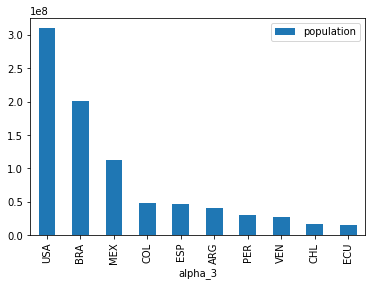

In [112]:
df_countries70_esMayorPob.set_index('alpha_3')[['population']].plot(kind='bar')

<AxesSubplot:xlabel='alpha_3'>

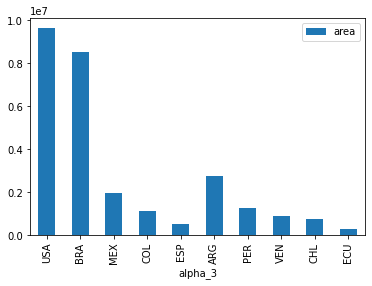

In [113]:
df_countries70_esMayorPob.set_index('alpha_3')[['area']].plot(kind='bar')

<AxesSubplot:xlabel='alpha_3'>

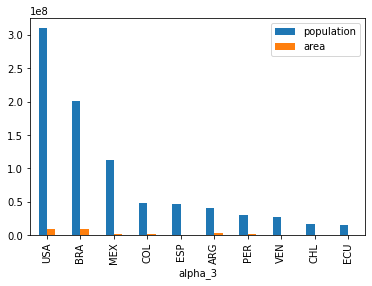

In [114]:
df_countries70_esMayorPob.set_index('alpha_3')[['population','area']].plot(kind='bar')

In [116]:
df_countries70_area = df_countries70[df_countries70['area']>200000] 
df_countries70_area

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,numeric,phone,population,tld
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,4,93,29121286,.af
7,AO,AGO,1246700.0,Luanda,AF,AOA,Kwanza,AO,3351879,pt-AO,Angola,24,244,13068161,.ao
8,AQ,ATA,14000000.0,NaN,AN,NaN,NaN,AY,6697173,Unk,Antarctica,10,NaN,0,.aq
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,32,54,41343201,.ar
12,AU,AUS,7686850.0,Canberra,OC,AUD,Dollar,AS,2077456,en-AU,Australia,36,61,21515754,.au
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,VN,VNM,329560.0,Hanoi,AS,VND,Dong,VM,1562822,"vi,en,fr,zh,km",Vietnam,704,84,89571130,.vn
245,YE,YEM,527970.0,Sanaa,AS,YER,Rial,YM,69543,ar-YE,Yemen,887,967,23495361,.ye
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,710,27,49000000,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,894,260,13460305,.zm


<AxesSubplot:xlabel='alpha_3'>

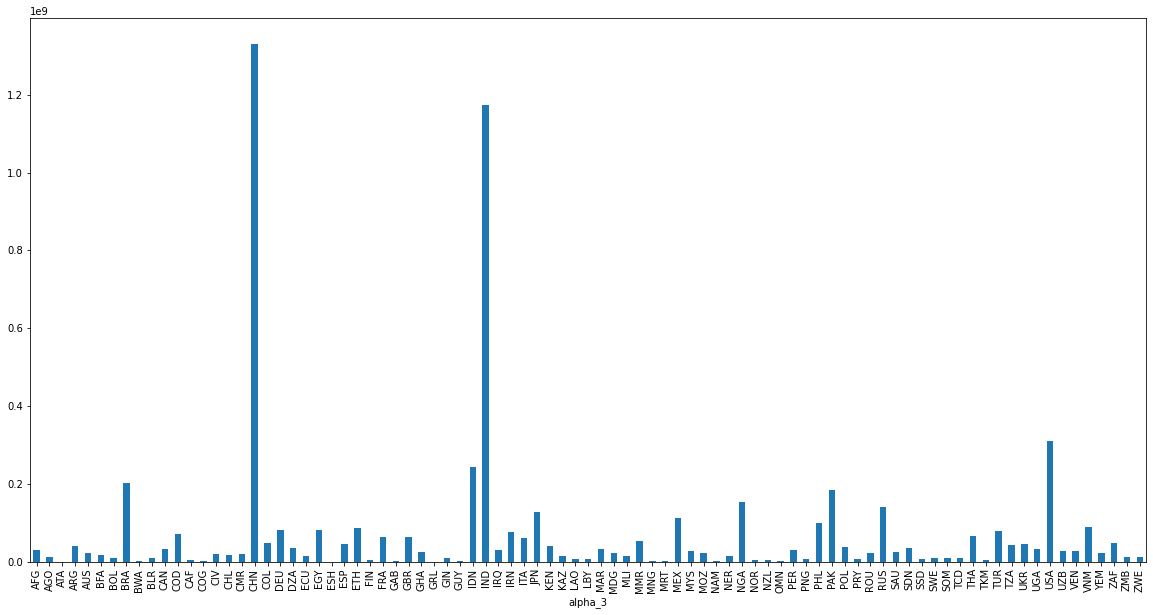

In [121]:
df_countries70_area.set_index('alpha_3')['population'].plot(kind='bar', figsize=(20,10))

<AxesSubplot:xlabel='alpha_3'>

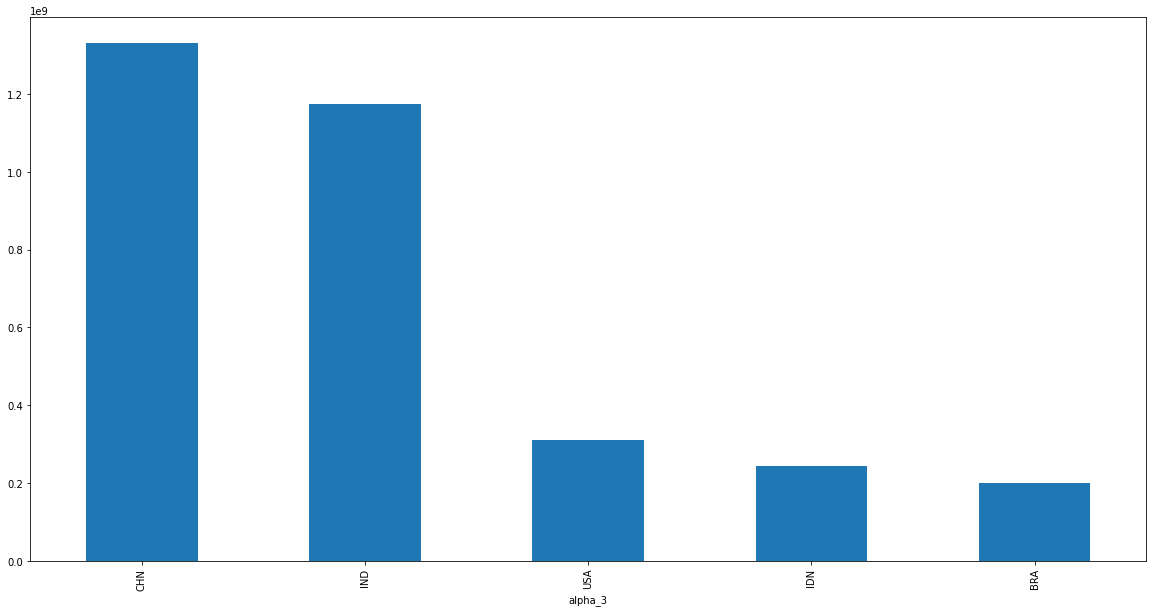

In [124]:
df_countries70_area.sort_values(by='population', ascending=False).head(5).set_index('alpha_3')['population'].plot(kind='bar', figsize=(20,10))

In [125]:
#fronteras de paises
df_countries[df_countries['alpha_3']=='MEX']

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
157,MX,MEX,1972550.0,Mexico City,NaN,MXN,Peso,NaN,MX,3996063,es-MX,Mexico,"GT,US,BZ",484,52,112468855,#####,^(\d{5})$,.mx


In [127]:
df_countries['neighbours'].fillna('UNK',inplace=True)

In [128]:
# Paises que tienen frontera con US
df_countries[df_countries['neighbours'].str.contains('US')]

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
37,CA,CAN,9984670.0,Ottawa,NaN,CAD,Dollar,NaN,CA,6251999,"en-CA,fr-CA,iu",Canada,US,124,1,33679000,@#@ #@#,^([ABCEGHJKLMNPRSTVXY]\d[ABCEGHJKLMNPRSTVWXYZ]...,.ca
50,CU,CUB,110860.0,Havana,NaN,CUP,Peso,NaN,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
157,MX,MEX,1972550.0,Mexico City,NaN,MXN,Peso,NaN,MX,3996063,es-MX,Mexico,"GT,US,BZ",484,52,112468855,#####,^(\d{5})$,.mx


In [ ]:
# 1.- cuáles son los países que tienen como currency name == Peso
# 2.- cuáles son los 5 países más grandes (área) que tienen como currency name == Peso 
# 3.- cuáles son los 5 países más grandes (en población) que tienen como currency name == Peso 



## Actividad 4

1. ¿cuáles son los países que tienen como currency name == Peso?
2. ¿cuáles son los 5 países más grandes (área) que tienen como currency name == Peso ?
3. ¿cuáles son los 5 países más grandes (en población) que tienen como currency name == Peso ?
4. ¿Cuáles son los países y currency code, con currency name== Peso?